<a href="https://colab.research.google.com/github/dongjun-kor/Python/blob/main/LSTM_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [353]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [354]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [355]:
df=pd.read_csv("/content/drive/MyDrive/LSTMipc1.csv",parse_dates =["date"], index_col ="date", engine='python',encoding='euc-kr', dtype={'N':'float'})

In [356]:
df

,N
date,
2021-01-10,9.0
2021-02-10,8.0
2021-03-10,10.0
2021-04-10,10.0
2021-05-10,5.0
...,...
2000-08-10,4.0
2000-09-10,2.0
2000-10-10,2.0


In [357]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 260 entries, 2021-01-10 to 2000-12-10
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       260 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


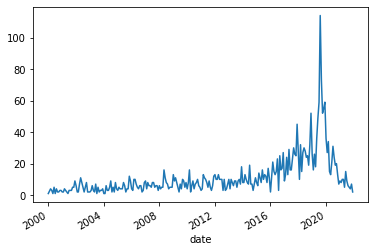

In [358]:
df['N'].plot()

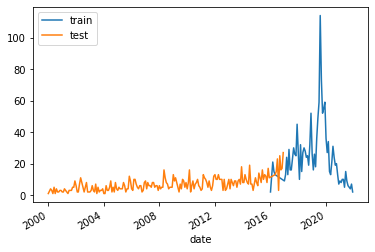

In [359]:
split_date = pd.Timestamp('2016-05-10')


train = df.loc[:split_date, ['N']]
test = df.loc[split_date:, ['N']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [360]:
#학습되지 않아서 정규화 진행 X
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

train_sc

array([[0.0625    ],
       [0.05357143],
       [0.07142857],
       [0.07142857],
       [0.02678571],
       [0.11607143],
       [0.0625    ],
       [0.03571429],
       [0.02678571],
       [0.01785714],
       [0.04464286],
       [0.        ],
       [0.30357143],
       [0.22321429],
       [0.28571429],
       [0.11607143],
       [0.09821429],
       [0.16964286],
       [0.25892857],
       [0.19642857],
       [0.15178571],
       [0.16071429],
       [0.09821429],
       [0.04464286],
       [0.21428571],
       [0.125     ],
       [0.21428571],
       [0.14285714],
       [0.30357143],
       [0.41964286],
       [0.50892857],
       [1.        ],
       [0.63392857],
       [0.44642857],
       [0.47321429],
       [0.50892857],
       [0.22321429],
       [0.07142857],
       [0.26785714],
       [0.11607143],
       [0.22321429],
       [0.25      ],
       [0.23214286],
       [0.19642857],
       [0.20535714],
       [0.15178571],
       [0.26785714],
       [0.446

In [361]:
train_sc_df = pd.DataFrame(train, columns=['N'], index=train.index)
test_sc_df = pd.DataFrame(test, columns=['N'], index=test.index)
train_sc_df.head()

,N
date,
2021-01-10,9.0
2021-02-10,8.0
2021-03-10,10.0
2021-04-10,10.0
2021-05-10,5.0


In [362]:
for s in range(1, 13):
    train_sc_df['shift_{}'.format(s)] = train_sc_df['N'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['N'].shift(s)

train_sc_df.head(13)

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,,
2021-01-10,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-10,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-10,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-10,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-10,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-10,9.0,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-10,6.0,9.0,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN
2021-09-10,5.0,6.0,9.0,15.0,5.0,10.0,10.0,8.0,9.0,NaN,NaN,NaN,NaN


In [363]:
X_train = train_sc_df.dropna().drop('N', axis=1)
y_train = train_sc_df.dropna()[['N']]

X_test = test_sc_df.dropna().drop('N', axis=1)
y_test = test_sc_df.dropna()[['N']]



X_train.head()

,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
date,,,,,,,,,,,,
2020-01-10,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0,10.0,8.0,9.0
2020-02-10,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0,10.0,8.0
2020-03-10,27.0,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0,10.0
2020-04-10,34.0,27.0,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0,10.0
2020-05-10,15.0,34.0,27.0,36.0,2.0,7.0,4.0,5.0,6.0,9.0,15.0,5.0


In [364]:
print(type(X_train))
X_train = X_train.values
print(type(X_train))
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values
print(X_train.shape)
#print(X_train)
print(y_train.shape)
#print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(53, 12)
(53, 1)


In [365]:
X_train_t = X_train.reshape(X_train.shape[0], 12, 1)
X_test_t = X_test.reshape(X_test.shape[0], 12, 1)

print("최종 DATA")
print(X_train_t.shape)
print(X_train_t)
print(y_train)

최종 DATA
(53, 12, 1)
[[[  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]
  [ 10.]
  [  8.]
  [  9.]]

 [[ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]
  [ 10.]
  [  8.]]

 [[ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]
  [ 10.]]

 [[ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]
  [ 10.]]

 [[ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]
  [  5.]]

 [[ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]
  [ 15.]]

 [[ 21.]
  [ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]
  [  9.]]

 [[ 31.]
  [ 21.]
  [ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
  [  5.]
  [  6.]]

 [[ 24.]
  [ 31.]
  [ 21.]
  [ 13.]
  [ 15.]
  [ 34.]
  [ 27.]
  [ 36.]
  [  2.]
  [  7.]
  [  4.]
 

In [366]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping

K.clear_session()
    
model = Sequential() # Sequeatial Model 
model.add(LSTM(50,activation='relu', input_shape=(12, 1))) # (timestep, feature) 
model.add(Dense(1)) # output = 1 
model.compile(loss='mae', optimizer='adam',metrics=['mae']) 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [367]:
early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1)

h=model.fit(X_train_t, y_train, epochs=1000,
          batch_size=50, verbose=1, callbacks=[early_stop])

Epoch 1/1000
2/2 [==============================] - 3s 39ms/step - loss: 25.4079 - mae: 25.4079
Epoch 2/1000
2/2 [==============================] - 0s 98ms/step - loss: 22.8600 - mae: 22.8600
Epoch 3/1000
2/2 [==============================] - 0s 105ms/step - loss: 20.9703 - mae: 20.9703
Epoch 4/1000
2/2 [==============================] - 0s 86ms/step - loss: 19.6651 - mae: 19.6651
Epoch 5/1000
2/2 [==============================] - 0s 82ms/step - loss: 17.9349 - mae: 17.9349
Epoch 6/1000
2/2 [==============================] - 0s 80ms/step - loss: 16.4634 - mae: 16.4634
Epoch 7/1000
2/2 [==============================] - 0s 82ms/step - loss: 15.4447 - mae: 15.4447
Epoch 8/1000
2/2 [==============================] - 0s 81ms/step - loss: 14.6380 - mae: 14.6380
Epoch 9/1000
2/2 [==============================] - 0s 113ms/step - loss: 14.1319 - mae: 14.1319
Epoch 10/1000
2/2 [==============================] - 0s 60ms/step - loss: 13.6816 - mae: 13.6816
Epoch 11/1000
2/2 [==================

In [368]:
score=model.evaluate(X_test_t,y_test,batch_size=50)
print(score)

4/4 [==============================] - 1s 10ms/step - loss: 2.6585 - mae: 2.6585
[2.6584525108337402, 2.6584525108337402]


In [369]:
print(X_test)

[[11. 14.  6. ... 23. 15. 13.]
 [ 8. 11. 14. ...  3. 23. 15.]
 [16.  8. 11. ... 25.  3. 23.]
 ...
 [ 2.  4.  1. ...  5.  5.  3.]
 [ 2.  2.  4. ...  9.  5.  5.]
 [ 3.  2.  2. ...  1.  9.  5.]]


In [370]:
train_sc_df.describe()

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,65.000000,64.000000,63.000000,62.000000,61.00000,60.000000,59.000000,58.000000,57.000000,56.000000,55.000000,54.000000,53.000000
mean,24.400000,24.578125,24.730159,24.790323,25.00000,25.383333,25.050847,25.051724,25.035088,24.946429,24.981818,25.148148,25.320755
std,19.019562,19.115194,19.229687,19.380688,19.47049,19.401286,19.394652,19.564040,19.737532,19.904700,20.086379,20.236719,20.390207
min,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,13.000000,12.750000,12.500000,12.250000,13.00000,13.000000,13.000000,13.000000,13.000000,12.250000,11.500000,10.750000,10.000000
50%,21.000000,21.000000,21.000000,22.000000,23.00000,23.500000,23.000000,22.000000,21.000000,20.500000,20.000000,20.500000,21.000000
75%,30.000000,30.000000,30.000000,30.000000,30.00000,30.250000,30.000000,30.000000,30.000000,30.250000,30.500000,30.750000,31.000000
max,114.000000,114.000000,114.000000,114.000000,114.00000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000


In [371]:
test_sc_df.describe()

,N,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
count,196.000000,195.000000,194.000000,193.000000,192.000000,191.000000,190.000000,189.000000,188.000000,187.000000,186.000000,185.000000,184.000000
mean,6.913265,6.933333,6.953608,6.979275,7.005208,7.020942,7.052632,7.063492,7.095745,7.117647,7.134409,7.167568,7.157609
std,4.451174,4.453733,4.456225,4.453415,4.450422,4.456761,4.446908,4.456192,4.445918,4.447672,4.453750,4.442755,4.452806
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
50%,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
75%,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.250000
max,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000


Text(0.5, 1.0, 'Prices vs Predicted price Index: $Y_i$ vs $\\hat{Y}_i$')

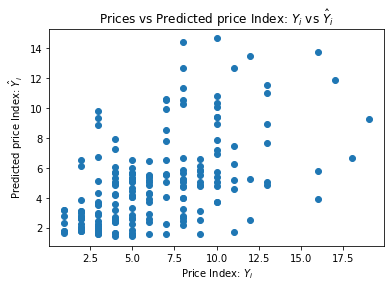

In [372]:
%matplotlib inline
import matplotlib.pyplot as plt


y_pred = model.predict(X_test_t, batch_size=50)
plt.scatter(y_test, y_pred)
plt.xlabel("Price Index: $Y_i$")
plt.ylabel("Predicted price Index: $\hat{Y}_i$")
plt.title("Prices vs Predicted price Index: $Y_i$ vs $\hat{Y}_i$")

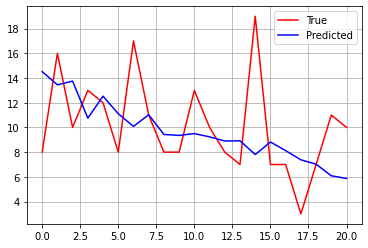

In [352]:
x_range = range(0,21)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, y_pred[x_range], color='blue')
plt.legend(['True', 'Predicted'], loc='best')
plt.grid()
plt.show()

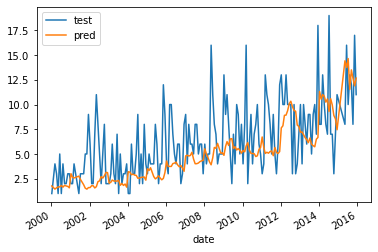

In [373]:
t_df=test_sc_df.dropna()
y_test_df=pd.DataFrame(y_test, columns=['N'], index=t_df.index)
y_pred_df=pd.DataFrame(y_pred, columns=['N'], index=t_df.index)

ax1=y_test_df.plot()
y_pred_df.plot(ax=ax1)
plt.legend(['test','pred'])

In [385]:
nFuture =12
nStep = 37

if len(df['N']) > 100:

    lastData = np.copy(df[-250:])  # 원 데이터의 마지막 100개만 그려본다

else:

    lastData = np.copy(df)

    

dx = np.copy(lastData)

estimate = [dx[-1]]

for i in range(nFuture):

    # 마지막 nStep 만큼 입력데이로 다음 값을 예측한다

    px = dx[-nStep:].reshape(1, nStep, 1)

    

    # 다음 값을 예측한다.

    yHat = model.predict(px)[0][0]

        

    # 예측값을 저장해 둔다

    estimate.append(yHat)

    

    # 이전 예측값을 포함하여 또 다음 값을 예측하기위해 예측한 값을 저장해 둔다

    dx = np.insert(dx, len(dx), yHat)


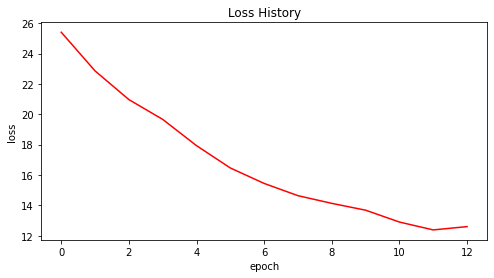

/usr/local/lib/python3.7/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


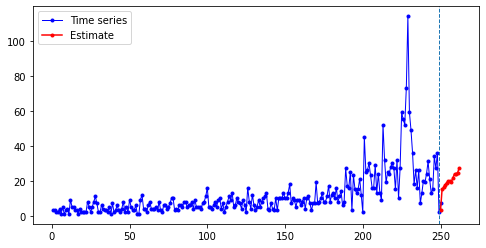

In [386]:
# Loss history를 그린다

plt.figure(figsize=(8, 4))

plt.plot(h.history['loss'], color='red')

plt.title("Loss History")

plt.xlabel("epoch")

plt.ylabel("loss")

plt.show()



# 원 시계열과 예측된 시계열을 그린다

ax1 = np.flip(np.arange(1, len(lastData) + 1))

ax2 = np.arange(len(lastData), len(lastData) + len(estimate))

plt.figure(figsize=(8, 4))

plt.plot(ax1, lastData, 'b-o', color='blue', markersize=3, label='Time series', linewidth=1)

plt.plot(ax2, estimate, 'b-o', color='red', markersize=3, label='Estimate')

plt.axvline(x=ax1[1],  linestyle='dashed', linewidth=1)

plt.legend()

plt.show()